In [1]:
import pandas as pd
import numpy as np
import re
import time

import bs4 as bs4
import json

import glob
import tqdm

pd.set_option("max_columns", 131)

%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Lendo arquivos com labels
Arquivo foi rotulado manualmente

In [2]:
df = pd.read_csv("raw_data_with_labels.csv", index_col = 0)
df = df[df['y'].notnull()]
df.shape

(498, 16)

In [3]:
df.head()

,watch-title,y,watch-view-count,watch-time-text,content_watch-info-tag-list,watch7-headline,watch7-user-header,watch8-sentiment-actions,og:image,og:image:width,og:image:height,og:description,og:video:width,og:video:height,og:video:tag,channel_link_0
0,How to Become A Machine Learning Engineer | Ho...,0.0,28.028 visualizações,Publicado em 3 de set. de 2018,Educação,#MachineLearningAlgorithms #Datasciencecourse ...,Simplilearn\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\...,28.028 visualizações\r\n\r\n\r\n\r\n\r\n\r\n\r...,https://i.ytimg.com/vi/-5hEYRt8JE0/maxresdefau...,1280.0,720.0,"This video on ""How to become a Machine Learnin...",1280.0,720.0,simplilearn,/channel/UCsvqVGtbbyHaMoevxPAq9Fg
1,BLOOPERS - Behind The Scenes. | DATA SCIENCE x...,0.0,1.131 visualizações,Publicado em 16 de nov. de 2018,Pessoas e blogs,#FAIL #insidezalando\r\n\r\n\r\n\r\n BLOOPE...,Inside Zalando\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n...,1.131 visualizações\r\n\r\n\r\n\r\n\r\n\r\n\r\...,https://i.ytimg.com/vi/-7GiiT0yEyk/maxresdefau...,1280.0,720.0,#FAIL :) Have fun - and join our teams: https:...,1280.0,720.0,employer branding,/channel/UCTPin8TK-KRSI9zo9FoxG0g
2,Michael I. Jordan: Machine Learning: Dynamical...,1.0,1.816 visualizações,Publicado em 2 de mai. de 2019,Licença de atribuição Creative Commons (reutil...,#purdue #michaelijordan #engineering\r\n\r\n\r...,Purdue Engineering\r\n\r\n\r\n\r\n\r\n\r\n\r\n...,1.816 visualizações\r\n\r\n\r\n\r\n\r\n\r\n\r\...,https://i.ytimg.com/vi/-8yYFdV5SOc/maxresdefau...,1280.0,720.0,2019 Purdue Engineering Distinguished Lecture ...,1280.0,720.0,electrical engineer,/channel/UC8FZ6dzFVkCACLH9YoMNFog
3,Best Deep Learning Tools - Welcome.AI,0.0,1.171 visualizações,Publicado em 13 de ago. de 2019,Ciência e tecnologia,Best Deep Learning Tools - Welcome.AI,Welcome.AI\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n...,1.171 visualizações\r\n\r\n\r\n\r\n\r\n\r\n\r\...,https://i.ytimg.com/vi/-9LLrwW1Vdo/maxresdefau...,1280.0,720.0,A collection of the 5 best deep learning tools...,1280.0,720.0,Watson,/channel/UC_215Y7rOAsqnFkO_hnpdIg
4,Kaggle Live-Coding: RNNs for Sarcasm Detection...,1.0,1.228 visualizações,Transmitido ao vivo em 30 de nov. de 2018,Ciência e tecnologia,Kaggle Live-Coding: RNNs for Sarcasm Detection...,Kaggle\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n...,1.228 visualizações\r\n\r\n\r\n\r\n\r\n\r\n\r\...,https://i.ytimg.com/vi/-9U84J178OQ/maxresdefau...,1280.0,720.0,Join Kaggle data scientist Rachael live as she...,1280.0,720.0,CS,/channel/UCSNeZleDn9c74yQc-EKnVTA


In [4]:
df.tail()

,watch-title,y,watch-view-count,watch-time-text,content_watch-info-tag-list,watch7-headline,watch7-user-header,watch8-sentiment-actions,og:image,og:image:width,og:image:height,og:description,og:video:width,og:video:height,og:video:tag,channel_link_0
496,Machine Learning With Python | Machine Learnin...,0.0,170.932 visualizações,Publicado em 1 de mar. de 2018,Educação,Machine Learning With Python | Machine Learnin...,Simplilearn\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\...,170.932 visualizações\r\n\r\n\r\n\r\n\r\n\r\n\...,https://i.ytimg.com/vi/Q59X518JZHE/maxresdefau...,1280.0,720.0,This Machine Learning with Python tutorial giv...,1280.0,720.0,simplilearn machine learning,/channel/UCsvqVGtbbyHaMoevxPAq9Fg
497,MACHINE LEARNING and AUGMENTED REALITY,0.0,69.644 visualizações,Publicado em 31 de mai. de 2018,Ciência e tecnologia,MACHINE LEARNING and AUGMENTED REALITY,MatthewHallberg\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\...,69.644 visualizações\r\n\r\n\r\n\r\n\r\n\r\n\r...,https://i.ytimg.com/vi/Q6ERFwQNkzo/maxresdefau...,1280.0,720.0,This tutorial is going to go through getting T...,1280.0,720.0,image classification tensorflow tutorial,/channel/UClm2DY6pj3ygKoKhEVr7KFw
498,Kaggle 대회 시작하기 #1,0.0,470 visualizações,Publicado em 10 de nov. de 2019,Pessoas e blogs,Palos Verdes\r\n\r\n\r\n\r\n Kaggle 대회 시작하기 #1,LA오빠\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r...,470 visualizações\r\n\r\n\r\n\r\n\r\n\r\n\r\n\...,https://i.ytimg.com/vi/Q71MI-MkGhg/maxresdefau...,1280.0,720.0,LA오남매아빠 #LA오빠 - #즐거운DataScience 오늘은 현재 진행 중인 A...,1280.0,720.0,Ashrae Energy Prediction,/channel/UCjhlZKSIRVvQxlUprmv0bdg
499,The Netacea Approach | Smarter Bot Management ...,1.0,99.855 visualizações,Publicado em 25 de abr. de 2019,Ciência e tecnologia,The Netacea Approach | Smarter Bot Management ...,Netacea\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\...,99.855 visualizações\r\n\r\n\r\n\r\n\r\n\r\n\r...,https://i.ytimg.com/vi/QDh1vq9tVsY/hqdefault.jpg,480.0,360.0,The majority of internet traffic is now made u...,1280.0,720.0,Cyber threats,/channel/UCMLXUedkowSUnn5rSXKUzCQ
500,Stanford CS224N: NLP with Deep Learning | Wint...,0.0,17.363 visualizações,Publicado em 21 de mar. de 2019,Educação,Stanford CS224N: NLP with Deep Learning | Wint...,stanfordonline\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n...,17.363 visualizações\r\n\r\n\r\n\r\n\r\n\r\n\r...,https://i.ytimg.com/vi/QEw0qEa0E50/maxresdefau...,1280.0,720.0,Professor Christopher Manning & PhD Candidate ...,1280.0,720.0,NaN,/channel/UCBa5G_ESCn8Yd4vw5U-gIcg


In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [6]:
# criando um DataFrame vazio
df_limpo = pd.DataFrame(index=df.index)

## 1. Limpeza de data

In [7]:
# criando um data frame, dividindo em colunas DIA-MÊS-ANO, utilizando expressão regular
clean_date = df["watch-time-text"].str.extract(r"(\d+) de ([a-z]+)\. de (\d+)")
# adicionando 0 a esquerda, em dias abaixo de 10
clean_date[0] = clean_date[0].map(lambda x: "0"+x[0] if len(x) == 1 else x)

mapa_meses = {"jan": "Jan",
              "fev": "Feb", 
              "mar": "Mar",
              "abr": "Apr",
              "mai": "May",
              "jun": "Jun",
              "jul": "Jul",
              "ago": "Aug",
              "set": "Sep",
              "out": "Oct",
              "nov": "Nov",
              "dez": "Dec"}
# Substituindo o mês para o formato inglês
clean_date[1] = clean_date[1].map(mapa_meses)
# Transformando tudo em uma linha (e não váris colunas com estava)
clean_date = clean_date.apply(lambda x: " ".join(x), axis = 1)
# jogando para o DataFrame criado anteriormente, em formato DATETIME
df_limpo["date"] = pd.to_datetime(clean_date, format= "%d %b %Y") 

## 2. Limpeza de views

In [8]:
# extraindo apenas os valores inteiros, retirando o "." do milhar
# atribuindo 0 para vídeos com "Nenhuma vizualização"
views = df["watch-view-count"].str.extract(r"(\d+\.?\d+)", expand=False).str.replace(".", "").fillna(0).astype(int)

In [9]:
df_limpo["views"] = views

In [10]:
# Novo DataFrame com as duas informações adicionadas
df_limpo.head()

,date,views
0,2018-09-03,28028
1,2018-11-16,1131
2,2019-05-02,1816
3,2019-08-13,1171
4,2018-11-30,1228


## 3. Features

In [11]:
# criando um novo DataFrame com indice igual ao criando anteriormente
features = pd.DataFrame(index=df_limpo.index)
# atribuindo minhas labels a ele (se o vídeo é bom ou ruim)
y = df["y"].copy()

In [12]:
# Atribuição da Data atual (da coleta de dados), menos data de publicação =  Quantos dias o vídeo está no ar
# np.timedelta64 -> para fazer a diferença em dias
features["tempo_desde_pub"] = (pd.to_datetime("2019-12-3") - df_limpo["date"]) / np.timedelta64(1, "D")
# atribuição da quantidade de views
features["views"] = df_limpo["views"]
# conta para obter a média de views por dia
features["views_por_dia"] = features["views"] / features["tempo_desde_pub"]
# após análise, vimos que não é preciso essa coluna
features = features.drop(["tempo_desde_pub"], axis = 1)

In [13]:
features.head()

,views,views_por_dia
0,28028,61.464912
1,1131,2.960733
2,1816,8.446512
3,1171,10.455357
4,1228,3.336957


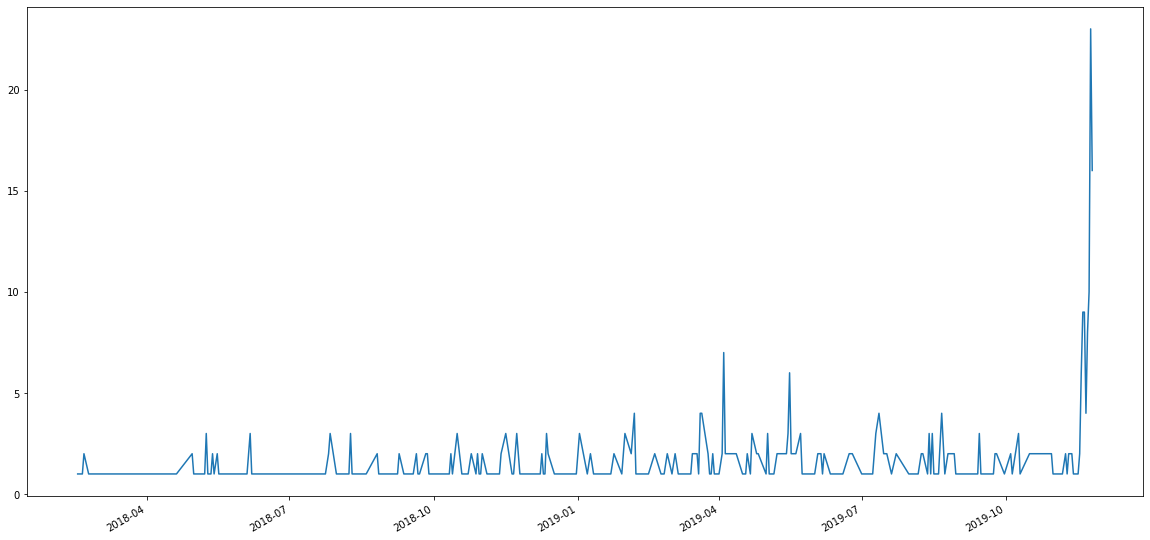

In [14]:
# analisando a quantidade de views por dia em um gráfico
df_limpo['date'].value_counts().plot(figsize=(20,10))

In [15]:
# Primeiro modelo apenas com duas features (views e views por dia) 
# para analisar o que elas indicam, seu efeito e suas previsões
# Divisão não exata, com mais ou menos 50% pra treino e 50% para teste
Xtrain, Xval = features[df_limpo["date"] < "2019-04-01"], features[df_limpo["date"] >= "2019-04-01"]
ytrain, yval = y[df_limpo["date"] < "2019-04-01"], y[df_limpo["date"] >= "2019-04-01"]
Xtrain.shape, Xval.shape, ytrain.shape, yval.shape

((228, 2), (270, 2), (228,), (270,))

In [16]:
Xtrain.head()

,views,views_por_dia
0,28028,61.464912
1,1131,2.960733
4,1228,3.336957
6,430097,903.565126
7,88592,308.682927


In [17]:
# criando uma arvore de decisão com profundidade dois
mdl = DecisionTreeClassifier(random_state=0, max_depth=2, class_weight="balanced")
mdl.fit(Xtrain, ytrain)

DecisionTreeClassifier(class_weight='balanced', max_depth=2, random_state=0)

In [42]:
# Predict proba = PROBABILIDADE DE SER 0 (não recomendavel) e 1 (recomendavel)
p = mdl.predict_proba(Xval)[:, 1]

In [44]:
from sklearn.metrics import roc_auc_score, average_precision_score

Precision = número que responde a pergunta. Ex: de todos os exemplos que meu modelo respondeu positivo, quantos ele realmente acertou?
<br>Ex: Precision de 0.50. De todos os exemplos que meu modelo falou que são positivos, metade ele acertou.

In [45]:
# será usado como baseline
average_precision_score(yval, p)

0.14554356473787755

ROC -> É uma taxa de detenção. De todos modelos que são positivos, quantos ele realmente previu positivos?
<br> <b> Entendendo AUC: </b>
<br> positivos = [ 0.1, 0.2, 0.3 ]
<br> negativos = [ 0.05, 0.15, 0.25 ]
<br> pos = 0.2, neg = 0.05 > SIM, 1, True
<br> pos = 0.1, neg = 0.15 > NÃO, 0, False
<br> Fazendo isso várias vezes e aleatoriamente, ao calcular a média dos valores 0 e 1, irá chegar no valor obtido a seguir.

In [20]:
roc_auc_score(yval, p)

0.5617021276595745

In [21]:
from sklearn.tree import plot_tree

### Explicando a árvore
Conforme visto anteriormente, decidimos utilizar uma árvore com apenas duas camadas. 
<br> <br> Na árvore a seguir, podemos identificar que o <b>primeiro nó (nó raiz)</b> basicamente divide em vídeos com MAIS e MENOS de 15 mil visualizações.  
<br> Partindo para esquerda, os vídeos com menos de 15 mil visualizações são sub-divididos em vídeos com média de 0.6 visualizações por dia. Os vídeos que tiverem menos que isso, podemos notar que já são descartados (Dos 228 vídeos, 14 são descartados de cara).
<br> <br> Partido pro lado direito, notamos que o modelo divide em exemplos com MAIS e MENOS de 26 mil visualizações. Ele atribui que os vídeos com menos de 26 mil visualização, como descartado (não recomendado).
<br><br><br> Concluimos que um modelo simples (de profundidade dois), nos recomenda vídeos com menos visualização (nó final três) por ter a maior peso ( ValorPositivo / ValorPositivo + ValorNegativo )

[Text(279.0, 453.0, 'views <= 15110.0\ngini = 0.5\nsamples = 228\nvalue = [114.0, 114.0]'),
 Text(139.5, 271.8, 'views_por_dia <= 0.699\ngini = 0.481\nsamples = 133\nvalue = [62.235, 92.625]'),
 Text(69.75, 90.59999999999997, 'gini = 0.0\nsamples = 14\nvalue = [8.143, 0.0]'),
 Text(209.25, 90.59999999999997, 'gini = 0.466\nsamples = 119\nvalue = [54.092, 92.625]'),
 Text(418.5, 271.8, 'views <= 26712.0\ngini = 0.414\nsamples = 95\nvalue = [51.765, 21.375]'),
 Text(348.75, 90.59999999999997, 'gini = 0.0\nsamples = 20\nvalue = [11.633, 0.0]'),
 Text(488.25, 90.59999999999997, 'gini = 0.453\nsamples = 75\nvalue = [40.133, 21.375]')]

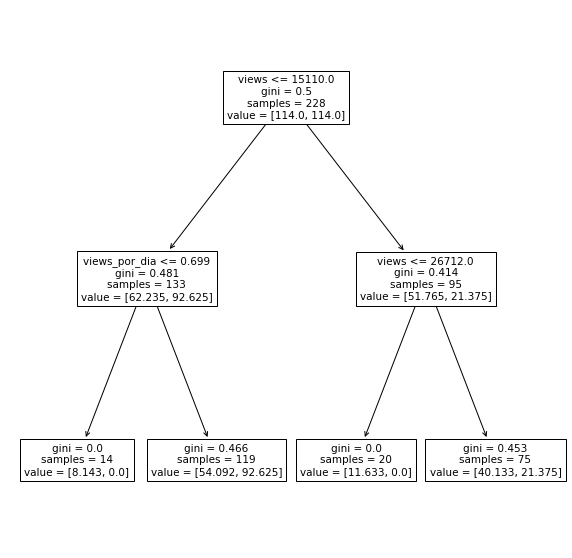

In [22]:
fig, ax = pylab.subplots(1,1, figsize = (10,10))
plot_tree(mdl, ax=ax, feature_names=Xtrain.columns)